# Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

import pickle

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('crop_recommendation.csv')

# Data Inspection & Preprocessing

In [4]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [6]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [7]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

No missing values

In [8]:
data['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [9]:
m, n = data.shape
print(f"Number of rows and columns is: {data.shape} respectively")

Number of rows and columns is: (2200, 8) respectively


In [10]:
data_copy = data.copy().drop(['label'], axis=1)

corr_matrix = data_copy.corr()

corr_matrix

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


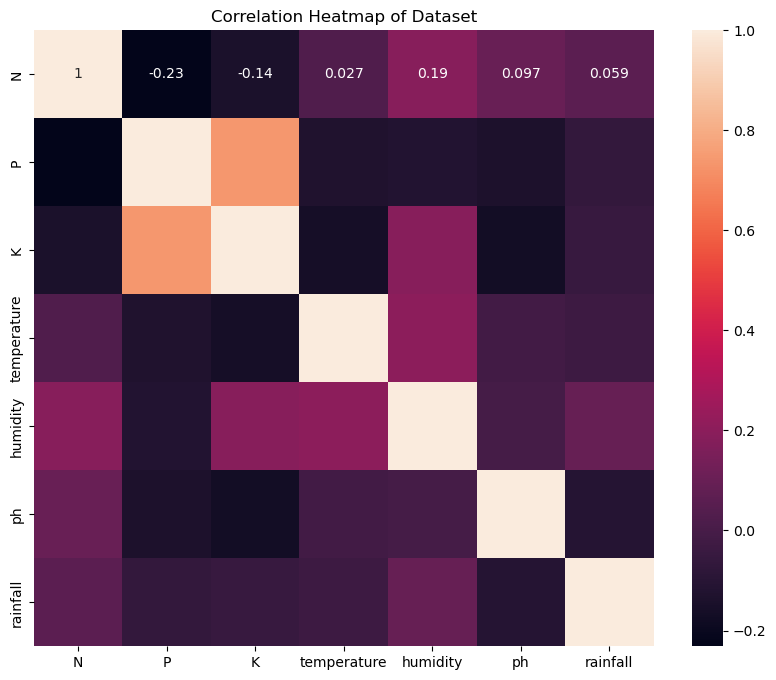

In [11]:
plt.figure(figsize=(10, 8))

sns.heatmap(corr_matrix, annot = True)

plt.title("Correlation Heatmap of Dataset")
plt.show()

In [12]:
y = data['label']
X = data.drop(['label'], axis=1)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.3, shuffle=True)

In [14]:
label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)

Since all features are numerical we do not need any additional data preprocessing for categorical columns

It is evident in data.describe() that there are some outliers but since we will stick to tree-ensemble methods, handling outliers won't make a difference.

The same goes for normalization & scaling for numerical columns

# Building the Baseline Model

    

In [15]:
my_model1 = XGBClassifier(n_estimators = 100)
my_model1.fit(X_train, y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [16]:
my_model2 = RandomForestClassifier(n_estimators = 100)
my_model2.fit(X_train, y_train_encoded)

RandomForestClassifier()

In [17]:
y_pred1 = my_model1.predict(X_test)
accuracy = accuracy_score(y_test_encoded, y_pred1)

print("Accuracy:", accuracy)
print('F1 score:',f1_score(y_test_encoded, y_pred1, average = 'weighted'))

Accuracy: 0.9818181818181818
F1 score: 0.9815419807788511


In [18]:
y_pred2 = my_model2.predict(X_test)
accuracy = accuracy_score(y_test_encoded, y_pred2)

print("Accuracy:", accuracy)
print('F1 score:',f1_score(y_test_encoded, y_pred2, average = 'weighted'))

Accuracy: 0.990909090909091
F1 score: 0.9908027019121827


# Hyperparameter Tuning

In [19]:
def best_params(cv_df): # model_name.best_params_
    best_test_score = cv_df[cv_df['mean_test_score']==cv_df['mean_test_score'].max()]
    best_test_train_score = best_test_score[best_test_score['mean_train_score']==best_test_score['mean_train_score'].max()]
    return best_test_train_score['params'].values

In [20]:
my_param_grid={
    'n_estimators' : [20, 50, 100, 200, 500],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 3, 4], 
}

In [21]:
rf_cv = GridSearchCV(estimator = RandomForestClassifier(),
                     param_grid = my_param_grid, 
                     cv = 5, 
                     n_jobs = -1, 
                     verbose = 2, 
                     return_train_score=True)
rf_cv.fit(X,y)

rf_grid = pd.DataFrame(rf_cv.cv_results_)
rf_paras = best_params(rf_grid)
rf_paras

Fitting 5 folds for each of 320 candidates, totalling 1600 fits


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;

array([{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 15, 'n_estimators': 20}],
      dtype=object)

In [22]:
my_model3 = RandomForestClassifier(n_estimators = 50, max_depth = None, min_samples_leaf = 2, min_samples_split = 10, random_state = 42)
my_model3.fit(X_train, y_train_encoded)

RandomForestClassifier(min_samples_leaf=2, min_samples_split=10,
                       n_estimators=50, random_state=42)

# Testing

In [23]:
y_pred3 = my_model3.predict(X_test)
accuracy = accuracy_score(y_test_encoded, y_pred3)

print("Accuracy:", accuracy)
print('F1 score:',f1_score(y_test_encoded, y_pred3, average = 'weighted'))

Accuracy: 0.9924242424242424
F1 score: 0.9923123255113585


# For Deployment

In [24]:
pickle.dump(my_model3,open('croprecommendationmodel.pkl','wb'))

In [25]:
pickled_model=pickle.load(open('croprecommendationmodel.pkl','rb'))

In [26]:
y_pred3 = pickled_model.predict(X_test)
accuracy = accuracy_score(y_test_encoded, y_pred3)

print("Accuracy:", accuracy)
print('F1 score:',f1_score(y_test_encoded, y_pred3, average = 'weighted'))

Accuracy: 0.9924242424242424
F1 score: 0.9923123255113585
